# ニュートン法

ニュートン法は与えられた方程式の解を数値的に求める手法。  
最適化の問題でも導関数が0になる点を求めることは最適解を求めることになるので、ニュートン法が使える場合がある。  
与えられたなめらかな関数$f(x)(x\in \mathbb{R})$について
$$f(x) = 0$$

を求めたいとする。  
ニュートン法は初期値$x_{0}$から逐次$x_{1}, x_{2},,,,,$を解に近づけていく。  
$y = f(x)$の$x=x_{k}$における接線と$x$軸との交点を$x_{k+1}$とし、十分小さい値$\varepsilon$について、

$$\left| x_{k+1}-x_{k}\right| <\varepsilon$$

となったら終了

$y = f(x)$の$x=x_{k}$における接線の傾きは$f'\left( x_{k}\right)$なので、接線の方程式は、

$$y=f'(x_{k})(x-x_{k}) + f(x_{k})$$

これと、x軸の好転が$x=x_{k+1}$となる。$x=x_{k+1}$, $y=0$と置くと、

$$x_{k+1}=x_{k}-\dfrac{f\left( x_{k}\right) }{f'\left( x_{k}\right) }$$

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x,y, k
from sympy.plotting import plot
from sympy.plotting import plot3d

import warnings
warnings.filterwarnings('ignore')

init_printing()

In [5]:
def f(x):
    return x**3-5*x+1


def df(x):
    return 3*x**2-5

def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x)/df(x)
        if abs(x-x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new



print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))


2.1284190638445777
0.20163967572340463
-2.330058739567982


In [6]:
from sympy.abc import x,y,k

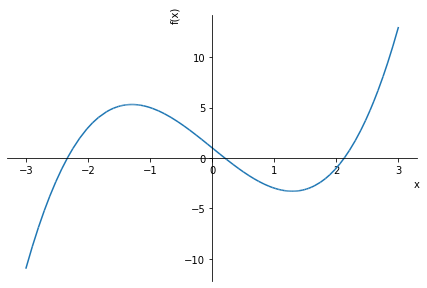

In [7]:
y = x**3 - 5*x + 1
plot(y, (x,-3,3))

ニュートン法は多次元の場合にも拡張できる。  
例として次のような連立方程式を考える。  

$$\begin{cases}f_{1}\left( x.y\right) =x^{3}-2y=0\\ f_{2}\left( x,y\right) =x^{2}+y^{2}-1=0\end{cases}$$


ニュートン法は多次元の場合にも拡張できる。  
例として次のような連立方程式を考える。  

$$\begin{cases}f_{1}\left( x.y\right) =x^{3}-2y=0\\ f_{2}\left( x,y\right) =x^{2}+y^{2}-1=0\end{cases}$$


$f$を$\mathbb{R} ^{2}$から$\mathbb{R} ^{2}$の写像として
$$f\left( \overrightarrow{x}\right) =\begin{pmatrix} f_{1}\left( \overrightarrow{x}\right) \\ f_{2}\left(\overrightarrow{x}\right) \end{pmatrix}$$

ここで
$$\overrightarrow{x}=\begin{pmatrix} x \\ y \end{pmatrix}$$

この時、$f$のヤコビヤン行列を次に定義

$$J_{f}\left( \overrightarrow{x}\right) =\begin{pmatrix} \dfrac{\partial f_{1}}{\partial x}\left( \overrightarrow{x}\right) & \dfrac{\partial f_{1}}{\partial y}\left( \overrightarrow{x}\right) \\ \dfrac{\partial f_{2}}{\partial x}\left( \overrightarrow{x}\right) & \dfrac{\partial f_{2}}{\partial y}\left( \overrightarrow{x}\right) \end{pmatrix} $$


この時、ニュートン法は次の更新式で与えられる。

$$\overrightarrow{x}_{k+1}=\overrightarrow{x}_{k}-J_{f}\left( \overrightarrow{x}_{k}\right) ^{-1} f(\overrightarrow{x}_{k})$$

In [8]:
import numpy as np
from numpy import linalg


class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter

    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1) # 1次元のベクトルに変換
        while True:
            x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x)) # linalg.inv()は逆行列の計算
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)] # np.vstackと同等で、更新毎のpathが格納されたベクトルが行で連なるイメージ
            if ((x-x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


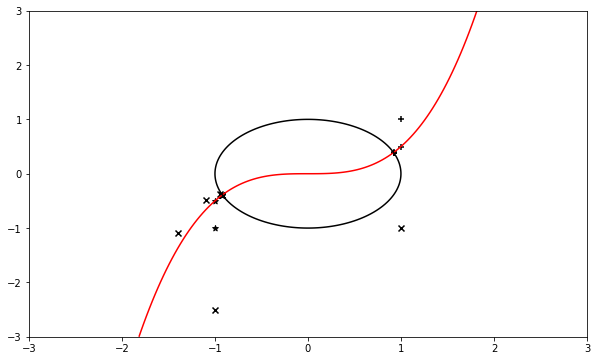

In [9]:

# 実際の様子

import numpy as np
import matplotlib.pyplot as plt
from Sample_code.chap04 import newton


def f1(x, y):
    return x**3-2*y


def f2(x, y):
    return x**2+y**2-1


def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

plt.figure(figsize = (10, 6))

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = newton.Newton(f, df)

initials = [np.array([1, 1]),
            np.array([-1, -1]),
            np.array([1, -1])]
markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
                solver.path_[:, 1], color="k", marker=m)
    print(sol)

plt.show()


## 参考 : ヤコビヤン行列
一変数の場合，微分係数は関数の一次近似（の接線の傾き）という意味があった。

$$y(x)≒ y(x_{0})+y′(x_{0})(x−x_{0})$$

多変数の場合，接線の傾きに相当するのがヤコビ行列

$$\overrightarrow{y}\left( \overrightarrow{x}\right) \fallingdotseq \overrightarrow{y}\left( \overrightarrow{x}_{0}\right)+J\left( \overrightarrow{x}_{0}\right) \left( \overrightarrow{x}-\overrightarrow{x}_{0}\right)$$